# 载入相关的包

In [4]:
# 这句话如果放在matplotlib之后就会报错
# 在github issue 上得知jupyter会change the matplotlib default for you automatically
# 所以可以调整顺序，先设定
%matplotlib inline

# load packages 
# 系统相关的包
import sys

# 矩阵运算包
import numpy as np

# 画图
import matplotlib
import matplotlib.pyplot as plt

# loom处理包
import loompy

# 论文代码
import velocyto as vcy

# 日志系统
import logging

# 机器学习包，线性支持向量机，线性回归
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# 统计建模和计量经济学工具包
from statsmodels.nonparametric.smoothers_lowess import lowess

# 一维插值
from scipy.interpolate import interp1d


# 日志系统
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)


# 图片的字体设置
plt.rcParams['pdf.fonttype'] = 42

## 准备相关的函数和文件

In [5]:
# plotting utility functions

# 图像调整
def despline():
    # 获取轴
    ax1 = plt.gca()
    
    # 去掉右边和顶端的两条线框
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    # 确定标注在坐标轴的什么位置
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

# around是一个四舍五入的函数，后面一位指定精度
def minimal_xticks(start, end):
    # 终止位做一个round
    end_ = np.around(end, -int(np.log10(end))+1)
    # 等分
    xlims = np.linspace(start, end_, 5)
    
    xlims_tx = [""]*len(xlims)
    # f"{}"是字符串的写法，标上起始和终止的数字
    xlims_tx[0], xlims_tx[-1] = f"{xlims[0]:.0f}", f"{xlims[-1]:.02f}"
    # 画出等分和标注
    plt.xticks(xlims, xlims_tx)


# 同样对y轴操作
def minimal_yticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    ylims = np.linspace(start, end_, 5)
    ylims_tx = [""]*len(ylims)
    ylims_tx[0], ylims_tx[-1] = f"{ylims[0]:.0f}", f"{ylims[-1]:.02f}"
    plt.yticks(ylims, ylims_tx)

In [4]:
# 创建文件夹
!mkdir data

mkdir: data: File exists


In [5]:
# 从网页上面下载内容
#from urllib.request import urlretrieve
#urlretrieve("http://pklab.med.harvard.edu/velocyto/DentateGyrus/DentateGyrus.loom", "data/DentateGyrus.loom")

('data/DentateGyrus.loom', <http.client.HTTPMessage at 0x1a1e93d438>)

# 连接数据库，还原出细胞的TSNE位置

In [6]:
# Crate an analysis object
# 实例化，做了连接数据库的工作
vlm = vcy.VelocytoLoom("data/DentateGyrus.loom")

In [11]:
# 数据库一行是一个基因，细胞是一个个列特征
# 列特征还有一个是聚类的组名
# 有18213个细胞，27998个基因
print(vlm.ca["ClusterName"].size)
print(vlm.ca["ClusterName"])

# 被分成14个类
print(len(set(vlm.ca["ClusterName"])))

18213
['ImmGranule2' 'ImmGranule2' 'CA2-3-4' ... 'nIPC' 'ImmGranule2'
 'ImmGranule2']
14


In [13]:
# Read column attributes form the loom file and specify colors
# 创造一个新的特征，特征包含了TSNE的结果
# concat two TSNE columns

# 结果主要包含前两个component，代表了细胞在二维的坐标位置
vlm.ts = np.column_stack([vlm.ca["TSNE1"], vlm.ca["TSNE2"]])

# set every group a color
# 为每一个group设定颜色
colors_dict = {'RadialGlia': np.array([ 0.95,  0.6,  0.1]), 'RadialGlia2': np.array([ 0.85,  0.3,  0.1]), 'ImmAstro': np.array([ 0.8,  0.02,  0.1]),
              'GlialProg': np.array([ 0.81,  0.43,  0.72352941]), 'OPC': np.array([ 0.61,  0.13,  0.72352941]), 'nIPC': np.array([ 0.9,  0.8 ,  0.3]),
              'Nbl1': np.array([ 0.7,  0.82 ,  0.6]), 'Nbl2': np.array([ 0.448,  0.85490196,  0.95098039]),  'ImmGranule1': np.array([ 0.35,  0.4,  0.82]),
              'ImmGranule2': np.array([ 0.23,  0.3,  0.7]), 'Granule': np.array([ 0.05,  0.11,  0.51]), 'CA': np.array([ 0.2,  0.53,  0.71]),
               'CA1-Sub': np.array([ 0.1,  0.45,  0.3]), 'CA2-3-4': np.array([ 0.3,  0.35,  0.5])}

# 是一个设定的操作，把类别的名字和类别对应的颜色字典输入
# 没有返回值，但是会创造四个新的特征
# cluster_labels, colorandum, cluster_ix, cluster_uid 
vlm.set_clusters(vlm.ca["ClusterName"], cluster_colors_dict=colors_dict)

In [15]:
# 对应好的颜色值
print(vlm.colorandum)
# 类的名字
print(vlm.cluster_labels)
# 类的编号
print(vlm.cluster_ix)
# 对应上类编号的类名
print(vlm.cluster_uid)

[[0.23 0.3  0.7 ]
 [0.23 0.3  0.7 ]
 [0.3  0.35 0.5 ]
 ...
 [0.9  0.8  0.3 ]
 [0.23 0.3  0.7 ]
 [0.23 0.3  0.7 ]]
[b'ImmGranule2' b'ImmGranule2' b'CA2-3-4' ... b'nIPC' b'ImmGranule2'
 b'ImmGranule2']
[ 7  7  2 ... 13  7  7]
[b'CA' b'CA1-Sub' b'CA2-3-4' b'GlialProg' b'Granule' b'ImmAstro'
 b'ImmGranule1' b'ImmGranule2' b'Nbl1' b'Nbl2' b'OPC' b'RadialGlia'
 b'RadialGlia2' b'nIPC']


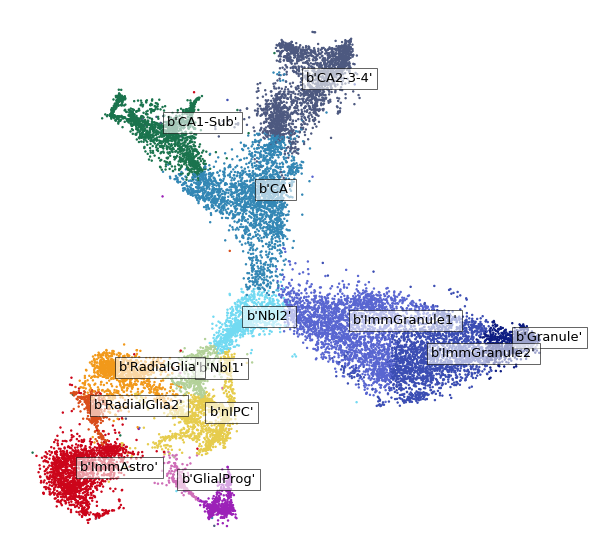

In [16]:
# Plot TSNE
# use plt to set a figure
# 设定画布大小
plt.figure(figsize=(10,10))

# vcy的包，坐标就是tsne存储的坐标
# 后面的参数和matplotplib.pyplot.scatter一样
# 分别是对应的颜色和点的大小，返回axes的object
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=2)

# 这里是13，类别数字是14
for i in range(max(vlm.ca["Clusters"])):
    # 分别取出ts中各个类别的细胞坐标,对column wide做中位数操作
    # 使得ts_m能够指示在簇的中间
    ts_m = np.median(vlm.ts[vlm.ca["Clusters"] == i, :], 0)
    
    # 设定字体位置，内容，字体大小，颜色
    # vlm.ca["Clusters"] == i得到的是T/F列表，同一簇细胞全为T
    # 然后用labels取出第一个名字（因为都是相同的）
    # bbox里设置的是底色白色和透明度alpha
    plt.text(ts_m[0], ts_m[1], str(vlm.cluster_labels[vlm.ca["Clusters"] == i][0]),
             fontsize=13, bbox={"facecolor":"w", "alpha":0.6})

# 去掉坐标轴
plt.axis("off");

In [17]:
## 看看是扔掉了哪个，发现是OPC
print(set(vlm.ca["ClusterName"]))

{'CA', 'Nbl2', 'GlialProg', 'ImmGranule1', 'OPC', 'CA1-Sub', 'RadialGlia', 'CA2-3-4', 'ImmAstro', 'nIPC', 'Granule', 'RadialGlia2', 'Nbl1', 'ImmGranule2'}


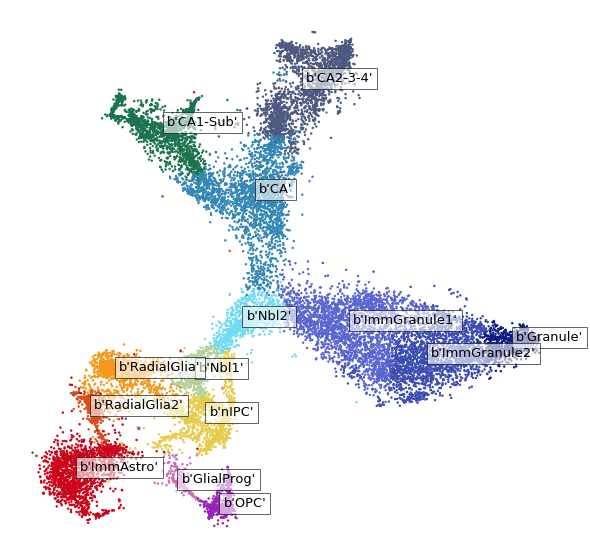

In [18]:
# 如果加上
plt.figure(figsize=(10,10))
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=2)
for i in range(max(vlm.ca["Clusters"])+1):
    ts_m = np.median(vlm.ts[vlm.ca["Clusters"] == i, :], 0)    
    plt.text(ts_m[0], ts_m[1], str(vlm.cluster_labels[vlm.ca["Clusters"] == i][0]),
             fontsize=13, bbox={"facecolor":"w", "alpha":0.6})
plt.axis("off");

# 丰度柱状图

In [20]:
# vlm.ca

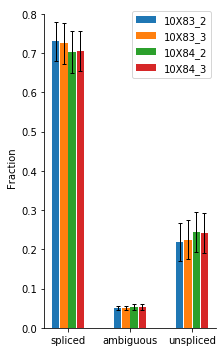

In [21]:
# 从上面的列特征上可以看到，10X83/84是chip ID，后面的下划线可能是lane，在Cell ID中也有体现
# 分为剪接,未剪接和模糊三类
vlm.plot_fractions()

# 过滤数据
## 筛count过低的细胞

In [26]:
max(vlm.initial_Ucell_size)

12234

In [27]:
vlm.initial_Ucell_size

array([1497, 1601, 2646, ...,  765, 1081,  874], dtype=uint64)

In [107]:
# 后面是一个百分数，返回这个百分数对应在原数据中的值
np.percentile(vlm.initial_Ucell_size,100)

12234.0

In [113]:
# 筛选前的ts
vlm.ts.shape

(18213, 2)

In [28]:
# 取百分之0.4作为阈值,产生一个bool列表取过滤细胞
# 过滤掉的是未剪接的count在最小的0.4%内的细胞
vlm.filter_cells(bool_array=vlm.initial_Ucell_size > np.percentile(vlm.initial_Ucell_size, 0.4))

In [29]:
# 重新concat一下ts
vlm.ts = np.column_stack([vlm.ca["TSNE1"], vlm.ca["TSNE2"]])

In [30]:
vlm.ts.shape

(18140, 2)

## 筛基因

In [31]:
# 设定阈值，产生一个self.detection_level_selected的特征
vlm.score_detection_levels(min_expr_counts=40, min_cells_express=30)
# 开启detection level过滤指标
vlm.filter_genes(by_detection_levels=True)

# 至少为40，且在至少30个细胞中都有检测

In [34]:
vlm.ra["Gene"].shape

(13843,)

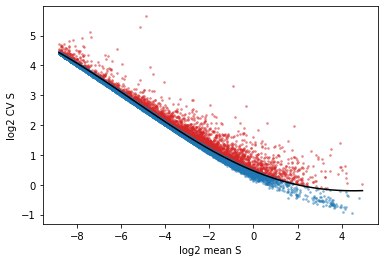

In [35]:
# Rank genes on the basis of a CV vs mean fit, it uses a nonparametric fit (Support Vector Regression)
# 通过SVR fit，N = 3000，画图
# The maximum average accepted before discarding from the the gene as house-keeping/outlier
vlm.score_cv_vs_mean(3000, plot=True, max_expr_avg=35)
# 开启过滤
vlm.filter_genes(by_cv_vs_mean=True)

In [39]:
vlm.ra["Gene"].shape

(3001,)

In [44]:
# 继续设定
vlm.score_detection_levels(min_expr_counts=40, min_cells_express=30, min_expr_counts_U=25, min_cells_express_U=20)
# 多了一个簇筛选
vlm.score_cluster_expression(min_avg_U=0.01, min_avg_S=0.08)
vlm.filter_genes(by_detection_levels=True, by_cluster_expression=True)

In [45]:
vlm.ra["Gene"].shape

(2159,)

In [42]:
# best with sample and expression scaling
# 归一化一下效果会更好
vlm._normalize_S(relative_size=vlm.initial_cell_size,
                 target_size=np.mean(vlm.initial_cell_size))
vlm._normalize_U(relative_size=vlm.initial_Ucell_size,
                 target_size=np.mean(vlm.initial_Ucell_size))

In [51]:
# 测试下面的复合语句
k = np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.002
# where返回的是一个元组，里面是array，所以要取两层
np.where(np.diff(k))

(array([19]),)

19

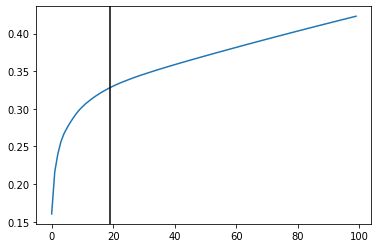

In [47]:
# 做一个PCA
vlm.perform_PCA()

# 累加前100个
plt.plot(np.cumsum(vlm.pca.explained_variance_ratio_)[:100])

# 方差贡献率的增长情况 np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))
# 当贡献率大于0.002的时候为T
# 然后再做一个diff，找到最后一个T（T和F的交界）
n_comps = np.where(np.diff(np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.002))[0][0]
# 在坐标轴上加一条垂直的线
plt.axvline(n_comps, c="k")
n_comps

# 聚类和分析

In [52]:
# KNN，创造了一些新的特征保存在object的属性里
k = 500
vlm.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8, b_maxl=k*4, n_jobs=16)

In [60]:
# Fit gamma using spliced and unspliced data
vlm.fit_gammas(limit_gamma=False, fit_offset=False)

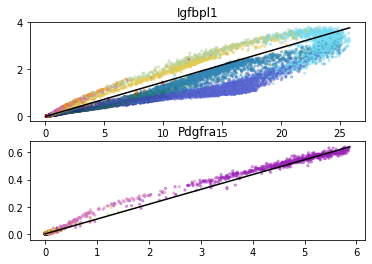

In [61]:
vlm.plot_phase_portraits(["Igfbpl1", "Pdgfra"])

# 计算速度和外推

In [62]:
# gamma model fit new feature： Upred = gamma * S
vlm.predict_U()

# U measured 减去 predict
vlm.calculate_velocity()

# 新特征 delta_S (np.ndarray) – The variation in gene expression
vlm.calculate_shift(assumption="constant_velocity")

# Sx_sz_t (np.ndarray) – the extrapolated expression profile
# used_delta_t (float) – stores delta_t for future usage
vlm.extrapolate_cell_at_t(delta_t=1.)

In [70]:
# 这里找一下，果然下面图中的两个东西代表着基因
aa = vlm.ra["Gene"] == "Igfbpl1"
aa = np.diff(aa)
np.where(aa)

(array([1336, 1337]),)

In [72]:
vlm.Sx_sz

array([[0.02197138, 0.01625645, 0.0477736 , ..., 0.16245324, 0.02143416,
        0.02308068],
       [0.00537181, 0.00537181, 0.01508046, ..., 0.13181898, 0.00533652,
        0.01918946],
       [0.26942871, 0.27392075, 0.46841655, ..., 0.14820016, 0.30630257,
        0.32593442],
       ...,
       [1.09202418, 1.01314802, 1.60759971, ..., 1.68079815, 1.18014108,
        0.9904371 ],
       [0.16784748, 0.17058757, 0.18723779, ..., 0.14049026, 0.17150731,
        0.17047662],
       [1.23043888, 1.35018817, 2.07764417, ..., 1.49144478, 1.18909086,
        1.23905205]])

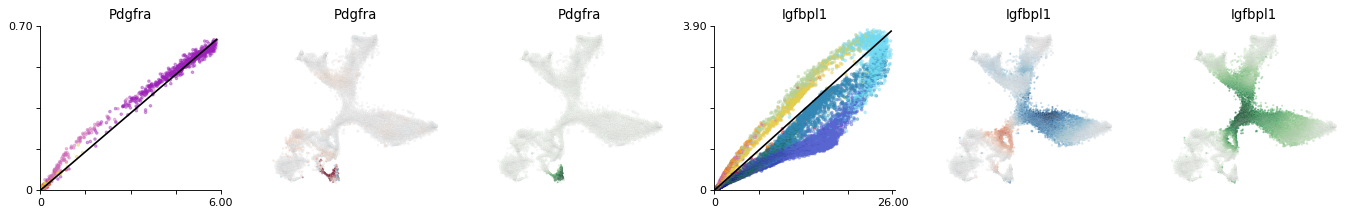

In [233]:
# 图片，number设None（增量式作图），画布大小和分辨率
plt.figure(None, (17,2.8), dpi=80)

gs = plt.GridSpec(1,6)

# 序号和基因名字
for i, gn in enumerate(["Pdgfra","Igfbpl1"]):
    # 选坐标轴，三个图一组
    ax = plt.subplot(gs[i*3])
    
    # 找到基因的序号
    try:
        ix=np.where(vlm.ra["Gene"] == gn)[0][0]
    except:
        continue
    
    # 坐标用每个细胞在该基因的两个表达值表示
    vcy.scatter_viz(vlm.Sx_sz[ix,:], vlm.Ux_sz[ix,:], c=vlm.colorandum, s=5, alpha=0.4, rasterized=True)
    # 标题
    plt.title(gn)
     
    # 等分坐标
    xnew = np.linspace(0,vlm.Sx[ix,:].max())
    
    # 画出预测的线
    plt.plot(xnew, vlm.gammas[ix] * xnew + vlm.q[ix], c="k")
    
    # 设定x和y的坐标范围
    plt.ylim(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    plt.xlim(0, np.max(vlm.Sx_sz[ix,:])*1.02)
    
    # 用到预先设定的函数，主要是设计图表的样式
    minimal_yticks(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    minimal_xticks(0, np.max(vlm.Sx_sz[ix,:])*1.02)
    despline()
    
    # 在tsne的图上画出速度
    # 基因名字，gridspec subplot的位置
    vlm.plot_velocity_as_color(gene_name=gn, gs=gs[i*3+1], s=3, rasterized=True)
    vlm.plot_expression_as_color(gene_name=gn, gs=gs[i*3+2], s=3, rasterized=True)
    
plt.tight_layout()
plt.savefig("./figures/Fig3_selection.pdf")

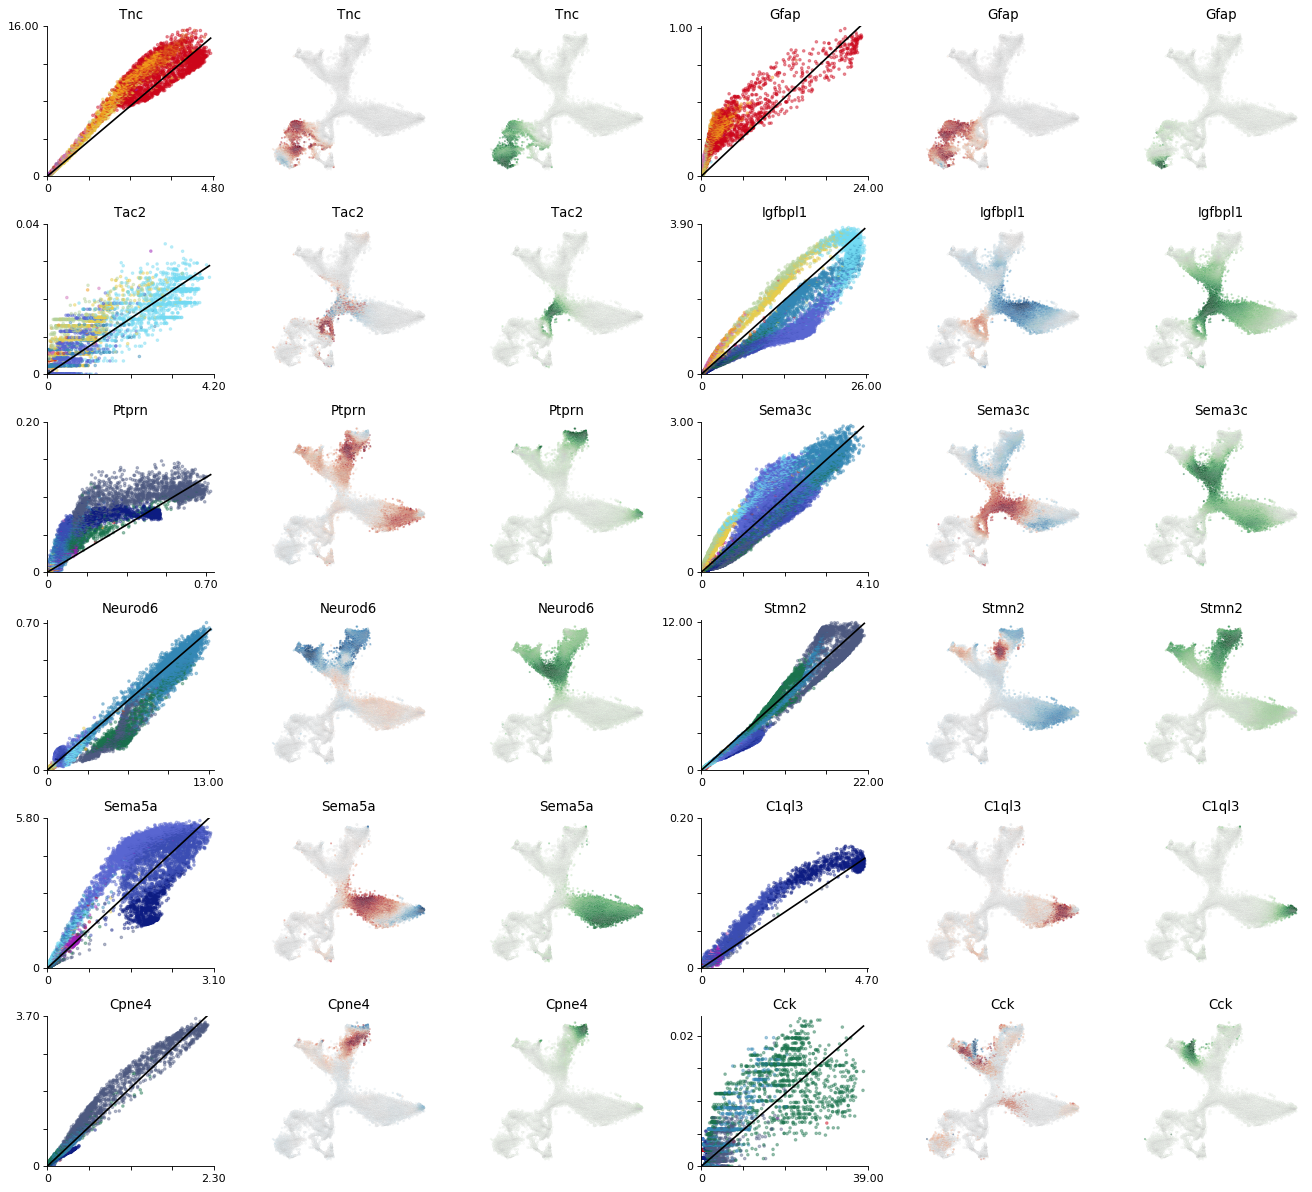

In [202]:
# 接下来同样的操作对其他的基因
plt.figure(None, (16.5,15), dpi=80)
gs = plt.GridSpec(6,6)
for i, gn in enumerate(["Tnc", "Gfap", "Tac2","Igfbpl1", 'Ptprn',
                        "Sema3c", "Neurod6", "Stmn2", "Sema5a", "C1ql3", "Cpne4", "Cck"]):
    ax = plt.subplot(gs[i*3])
    try:
        ix=np.where(vlm.ra["Gene"] == gn)[0][0]
    except:
        continue
    vcy.scatter_viz(vlm.Sx_sz[ix,:], vlm.Ux_sz[ix,:], c=vlm.colorandum, s=5, alpha=0.4, rasterized=True)
    plt.title(gn)
    xnew = np.linspace(0,vlm.Sx[ix,:].max())
    plt.plot(xnew, vlm.gammas[ix] * xnew + vlm.q[ix], c="k")
    plt.ylim(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    plt.xlim(0, np.max(vlm.Sx_sz[ix,:])*1.02)
    minimal_yticks(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    minimal_xticks(0, np.max(vlm.Sx_sz[ix,:])*1.02)
    despline()
    
    vlm.plot_velocity_as_color(gene_name=gn, gs=gs[i*3+1], s=3, rasterized=True)

    vlm.plot_expression_as_color(gene_name=gn, gs=gs[i*3+2], s=3, rasterized=True)
    
plt.tight_layout()
plt.savefig("./figures/Suppl_phase_selection.pdf")

# 估计转移概率

In [267]:
# fixed
# warning:/Users/wangxin/github/velocyto.py/velocyto/analysis.py:1564: FutureWarning: arrays to stack must be passed 
# as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated 
# as of NumPy 1.16 and will raise an error in the future.
# p=p) for i in range(neigh_ixs.shape[0])), 0)
np.stack(list(np.random.choice(10,size=(5,),replace=False) for i in range(3)),axis= 0)

array([[8, 9, 5, 1, 4],
       [8, 2, 9, 1, 4],
       [4, 9, 3, 5, 0]])

In [73]:
# 估计转移概率
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=2000, knn_random=True, sampled_fraction=0.5)

In [75]:
# 投影方向
# transition_prob: the transition probability calculated using the exponential kernel on the correlation coefficient
# delta_embedding:  The resulting vector
# Use the transition probability to project the velocity direction on the embedding
vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)

# Calculate the velocity using a points on a regular grid and a gaussian kernel
vlm.calculate_grid_arrows(smooth=0.8, steps=(40, 40), n_neighbors=300)

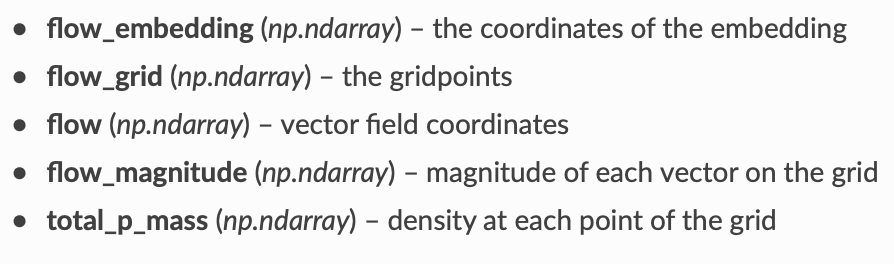

In [79]:
vlm.flow.shape

(1600, 2)

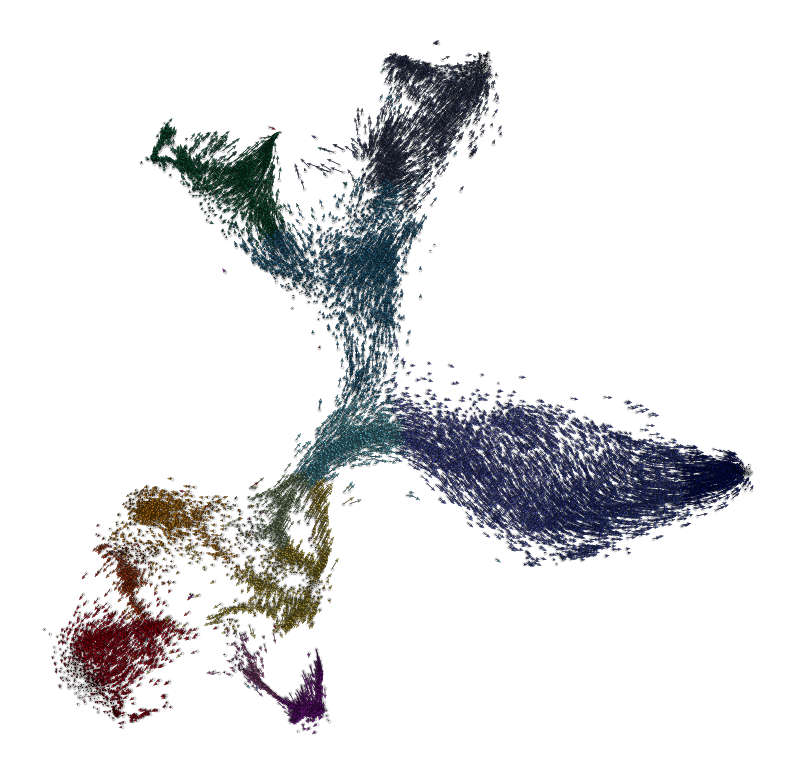

In [274]:
# 画图
plt.figure(None,(14,14))
# 箭头尺寸
quiver_scale = 60

# 坐标，颜色，透明度，点大小，
plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
            c="0.8", alpha=0.2, s=10, edgecolor="")

# 选择点，现在是全选了
ix_choice = np.random.choice(vlm.embedding.shape[0], size=int(vlm.embedding.shape[0]/1.), replace=False)

# 这里为啥再画一次
plt.scatter(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
            c="0.8", alpha=0.4, s=10, edgecolor=(0,0,0,1), lw=0.3, rasterized=True)

# 箭头样式
quiver_kwargs=dict(headaxislength=7, headlength=11, headwidth=8,linewidths=0.25, width=0.00045,edgecolors="k", color=vlm.colorandum[ix_choice], alpha=1)
# 画箭头
plt.quiver(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
           vlm.delta_embedding[ix_choice, 0], vlm.delta_embedding[ix_choice, 1],
           scale=quiver_scale, **quiver_kwargs)

# 去掉坐标轴
plt.axis("off")
# 保存
plt.savefig("./figures/full_arrows.pdf")

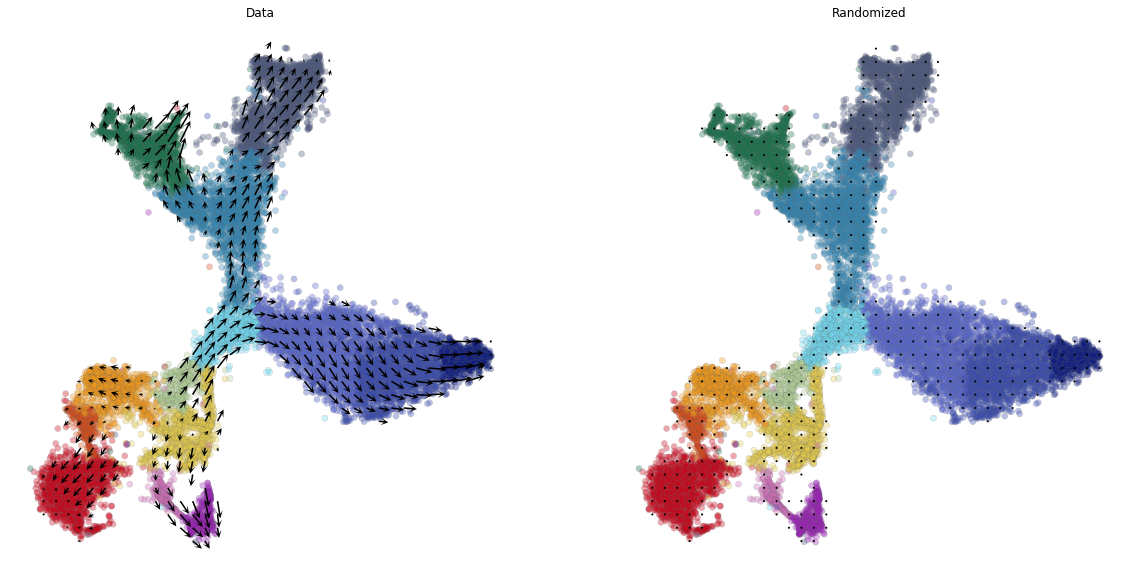

In [276]:
# initial divide by mean

# 用包里面的画图
plt.figure(None,(20,10))
vlm.plot_grid_arrows(quiver_scale=0.48,
                     scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=24, angles='xy', scale_units='xy',
                     headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                     plot_random=True, scale_type="absolute")

plt.savefig("./figures/vectorfield.pdf")

# 画更细致的图

In [23]:
def gaussian_kernel(X, mu = 0, sigma=1):
    return np.exp(-(X - mu)**2 / (2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)

In [27]:
from scipy.stats import norm
from sklearn.neighbors import NearestNeighbors

2018-05-13 11:42:06,756 - DEBUG - Assigning font /b'F1' = '/data/home/linnarsson/env/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2018-05-13 11:42:06,778 - DEBUG - Embedding font /data/home/linnarsson/env/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2018-05-13 11:42:06,779 - DEBUG - Writing TrueType font.


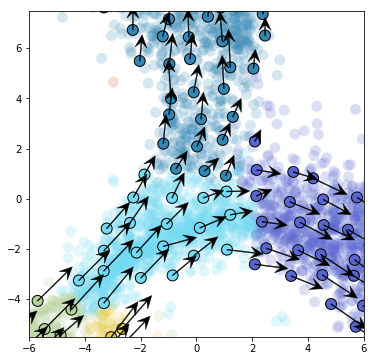

In [785]:
plt.figure(None,(6,6))

steps = 45, 45
grs = []
for dim_i in range(vlm.embedding.shape[1]):
    m, M = np.min(vlm.embedding[:, dim_i]), np.max(vlm.embedding[:, dim_i])
    m = m - 0.025 * np.abs(M - m)
    M = M + 0.025 * np.abs(M - m)
    gr = np.linspace(m, M, steps[dim_i])
    grs.append(gr)

meshes_tuple = np.meshgrid(*grs)
gridpoints_coordinates = np.vstack([i.flat for i in meshes_tuple]).T
gridpoints_coordinates = gridpoints_coordinates + norm.rvs(loc=0, scale=0.15, size=gridpoints_coordinates.shape)

nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(gridpoints_coordinates, 20)
ix_choice = ixs[:,0].flat[:]
ix_choice = np.unique(ix_choice)

nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(vlm.embedding[ix_choice], 20)
density_extimate = gaussian_kernel(dist, mu=0, sigma=0.5).sum(1)
bool_density = density_extimate > np.percentile(density_extimate, 25)
ix_choice = ix_choice[bool_density]

plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
            c=vlm.colorandum, alpha=0.2, s=120, edgecolor="")
plt.scatter(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
            c=vlm.colorandum[ix_choice], alpha=1, s=120, edgecolor="k")

quiver_kwargs=dict(scale=6.8, headaxislength=9, headlength=15, headwidth=14,linewidths=0.4, edgecolors="k", color="k", alpha=1)
plt.quiver(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
           vlm.delta_embedding[ix_choice, 0], vlm.delta_embedding[ix_choice, 1],
           **quiver_kwargs)

plt.xlim(-6.,6) 
plt.ylim(-5.5,7.5)
plt.savefig("../figures/grid_arrows_neuro.pdf")

2018-05-13 11:43:06,759 - DEBUG - Assigning font /b'F1' = '/data/home/linnarsson/env/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2018-05-13 11:43:06,784 - DEBUG - Embedding font /data/home/linnarsson/env/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2018-05-13 11:43:06,784 - DEBUG - Writing TrueType font.


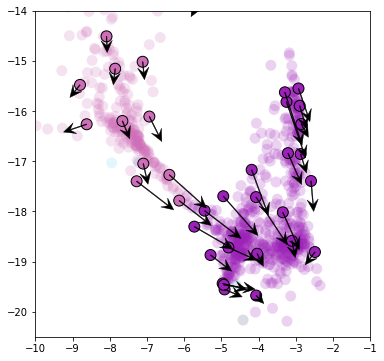

In [789]:
plt.figure(None,(6,6))

steps = 55, 55
grs = []
for dim_i in range(vlm.embedding.shape[1]):
    m, M = np.min(vlm.embedding[:, dim_i]), np.max(vlm.embedding[:, dim_i])
    m = m - 0.025 * np.abs(M - m)
    M = M + 0.025 * np.abs(M - m)
    gr = np.linspace(m, M, steps[dim_i])
    grs.append(gr)

meshes_tuple = np.meshgrid(*grs)
gridpoints_coordinates = np.vstack([i.flat for i in meshes_tuple]).T
gridpoints_coordinates = gridpoints_coordinates + norm.rvs(loc=0, scale=0.15, size=gridpoints_coordinates.shape)

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(gridpoints_coordinates, 20)
ix_choice = ixs[:,0].flat[:]
ix_choice = np.unique(ix_choice)

nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(vlm.embedding[ix_choice], 20)
density_extimate = gaussian_kernel(dist, mu=0, sigma=0.5).sum(1)
bool_density = density_extimate > np.percentile(density_extimate, 30)
ix_choice = ix_choice[bool_density]

plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
            c=vlm.colorandum, alpha=0.2, s=120, edgecolor="")

plt.scatter(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
            c=vlm.colorandum[ix_choice], alpha=1, s=120, edgecolor="k")

quiver_kwargs=dict(scale=6.8, headaxislength=9, headlength=15, headwidth=14,linewidths=0.4, edgecolors="k", color="k", alpha=1)
#quiver_kwargs=dict(headaxislength=8, headlength=10, headwidth=1,linewidths=0.1, edgecolors="k", color=self.colorandum[ix_choice])


plt.quiver(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
           vlm.delta_embedding[ix_choice, 0], vlm.delta_embedding[ix_choice, 1],
           **quiver_kwargs)

plt.xlim(-10,-1)
plt.ylim(-20.5,-14)
plt.savefig("../figures/grid_arrows_oligos.pdf")


In [806]:
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=4000, knn_random=True, sampled_fraction=0.98, calculate_randomized=False)

2018-05-13 12:09:02,414 - DEBUG - Calculate KNN in the embedding space
2018-05-13 12:09:46,574 - DEBUG - Correlation Calculation 'knn_random'
2018-05-13 12:14:00,279 - DEBUG - Done Correlation Calculation


In [807]:
vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)

2018-05-13 12:14:00,289 - DEBUG - Calculate transition probability
2018-05-13 12:14:03,768 - DEBUG - Calculate transition probability for negative control


In [808]:
transition_probs = np.copy(vlm.transition_prob)

9187
12258
2018-05-13 12:32:51,290 - DEBUG - Assigning font /b'F1' = '/data/home/linnarsson/env/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2018-05-13 12:32:51,427 - DEBUG - Embedding font /data/home/linnarsson/env/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2018-05-13 12:32:51,428 - DEBUG - Writing TrueType font.


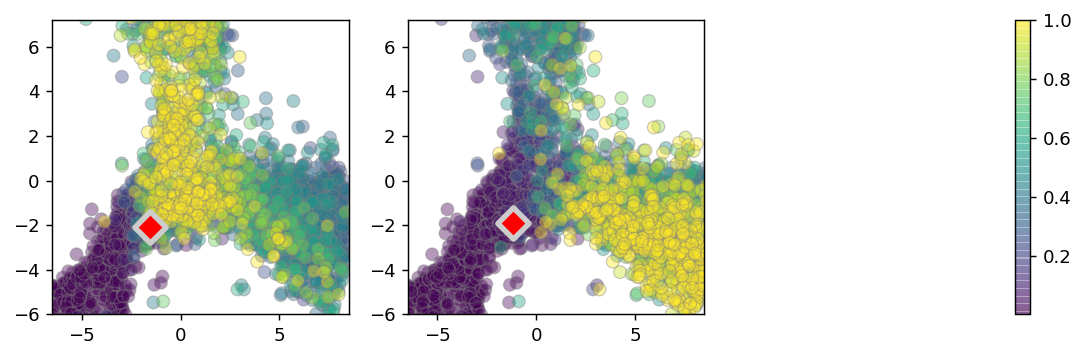

In [815]:
plt.figure(None,(10,3), dpi=130)
plt.subplot(131)
ix1 = 9187
print(ix1)
ix = ix1
neigh_bool = (vlm.embedding_knn[ix,:].A[0] > 0)
colorandum = vlm.transition_prob[ix,:][neigh_bool]
#print(np.percentile(colorandum, 10))
#print(np.percentile(colorandum, 90))
colorandum -= 1e-6 
colorandum = colorandum / 7e-4
colorandum = np.clip(colorandum, 0, 1)
plt.scatter(vlm.embedding[neigh_bool,:][:, 0][np.argsort(colorandum)],
            vlm.embedding[neigh_bool,:][:, 1][np.argsort(colorandum)],
            c=colorandum[np.argsort(colorandum)], 
            cmap=plt.cm.viridis, alpha=0.4, lw=0.7, s=50, edgecolor="0.5", rasterized=True)
plt.scatter(vlm.embedding[ix, 0], vlm.embedding[ix, 1],
            c="r", alpha=1, s=150, lw=3, edgecolor="0.8", marker="D")
plt.xlim(-6.5,8.5) 
plt.ylim(-6,7.2)


plt.subplot(132)
ix2 = 12258 
print(ix2)
ix = ix2

neigh_bool = (vlm.embedding_knn[ix,:].A[0] > 0)
colorandum = vlm.transition_prob[ix,:][neigh_bool]
#print(np.percentile(colorandum, 10))
#print(np.percentile(colorandum, 90))
colorandum -= 1e-6
colorandum = colorandum / 7e-4
colorandum = np.clip(colorandum, 0, 1)

ax = plt.scatter(vlm.embedding[neigh_bool,:][:, 0][np.argsort(colorandum)],
                 vlm.embedding[neigh_bool,:][:, 1][np.argsort(colorandum)],
                 c=colorandum[np.argsort(colorandum)], 
                 cmap=plt.cm.viridis, alpha=0.4, lw=0.7, s=50, edgecolor="0.5", rasterized=True)

plt.scatter(vlm.embedding[ix, 0], vlm.embedding[ix, 1],
            c="r", alpha=1, s=150, lw=3, edgecolor="0.8", marker="D")
plt.xlim(-6.5,8.5) 
plt.ylim(-6,7.2)

plt.subplot(133)
plt.colorbar(ax)
plt.axis("off")
plt.savefig("../figures/Fig3_neuro_tp.pdf")

0.00010687063518881769
0.0004985341416446812
1.934112160004972e-05
0.0008293442724157537
2018-05-13 12:22:53,419 - DEBUG - Assigning font /b'F1' = '/data/home/linnarsson/env/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2018-05-13 12:22:53,549 - DEBUG - Embedding font /data/home/linnarsson/env/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2018-05-13 12:22:53,550 - DEBUG - Writing TrueType font.


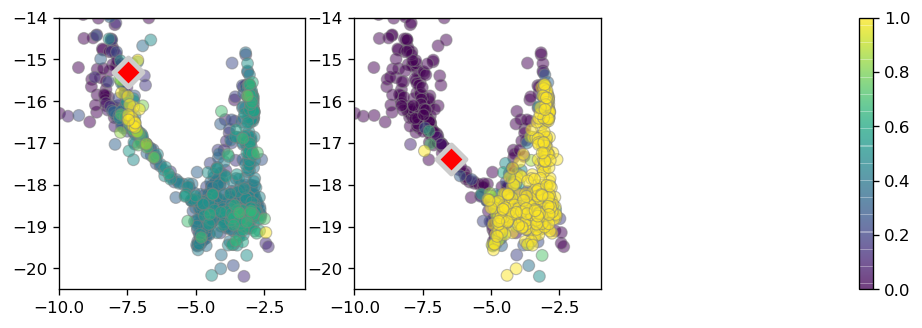

In [814]:
plt.figure(None,(9,3), dpi=120)
plt.subplot(131)
ix1 = 15608 # 4563


ix = ix1
neigh_bool = (vlm.embedding_knn[ix,:].A[0] > 0)
colorandum = vlm.transition_prob[ix,:][neigh_bool]
print(np.percentile(colorandum, 10))
print(np.percentile(colorandum, 90))
colorandum -= 2e-4 
colorandum = colorandum / 7e-4
colorandum = np.clip(colorandum, 0, 1)
plt.scatter(vlm.embedding[neigh_bool,:][:, 0][np.argsort(colorandum)],
            vlm.embedding[neigh_bool,:][:, 1][np.argsort(colorandum)],
            c=colorandum[np.argsort(colorandum)], 
            cmap=plt.cm.viridis, alpha=0.5, lw=0.7, s=50, edgecolor="0.5", rasterized=True)
plt.scatter(vlm.embedding[ix, 0], vlm.embedding[ix, 1],
            c="r", alpha=1, s=150, lw=3, edgecolor="0.8", marker="D")
plt.xlim(-10,-1)
plt.ylim(-20.5,-14)

plt.subplot(132)
ix2 = 10977
ix = ix2

neigh_bool = (vlm.embedding_knn[ix,:].A[0] > 0)
colorandum = vlm.transition_prob[ix,:][neigh_bool]
print(np.percentile(colorandum, 10))
print(np.percentile(colorandum, 90))
colorandum -= 2e-4
colorandum = colorandum / 7e-4
colorandum = np.clip(colorandum, 0, 1)
ax = plt.scatter(vlm.embedding[neigh_bool,:][:, 0][np.argsort(colorandum)],
                 vlm.embedding[neigh_bool,:][:, 1][np.argsort(colorandum)],
                 c=colorandum[np.argsort(colorandum)], 
                 cmap=plt.cm.viridis, alpha=0.5, lw=0.7, s=50, edgecolor="0.5", rasterized=True)
#plt.colorbar()
plt.scatter(vlm.embedding[ix, 0], vlm.embedding[ix, 1],
            c="r", alpha=1, s=150, lw=3, edgecolor="0.8", marker="D")
plt.xlim(-10,-1)
plt.ylim(-20.5,-14)
plt.subplot(133)
plt.colorbar(ax)
plt.axis("off")
plt.savefig("../figures/Fig3_oligos_tp.pdf")

## Markov chain

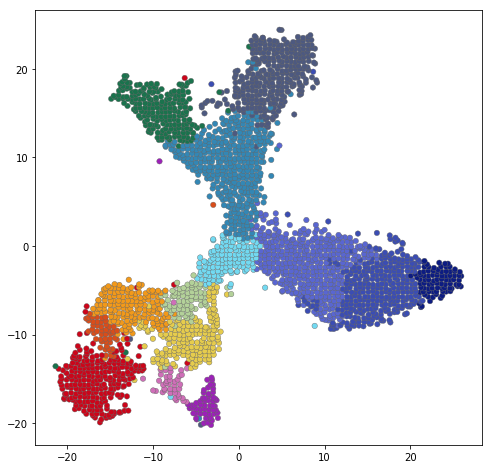

In [769]:
# Sample uniformly the points to avoid density driven effects - Should reimplement as a method
steps = 100, 100
grs = []
for dim_i in range(vlm.embedding.shape[1]):
    m, M = np.min(vlm.embedding[:, dim_i]), np.max(vlm.embedding[:, dim_i])
    m = m - 0.025 * np.abs(M - m)
    M = M + 0.025 * np.abs(M - m)
    gr = np.linspace(m, M, steps[dim_i])
    grs.append(gr)

meshes_tuple = np.meshgrid(*grs)
gridpoints_coordinates = np.vstack([i.flat for i in meshes_tuple]).T

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(gridpoints_coordinates, 1)

diag_step_dist = np.sqrt((meshes_tuple[0][0,0] - meshes_tuple[0][0,1])**2 + (meshes_tuple[1][0,0] - meshes_tuple[1][1,0])**2)
min_dist = diag_step_dist / 2
ixs = ixs[dist < min_dist]
gridpoints_coordinates = gridpoints_coordinates[dist.flat[:]<min_dist,:]
dist = dist[dist < min_dist]

ixs = np.unique(ixs)

plt.figure(None,(8,8))
vcy.scatter_viz(vlm.embedding[ixs, 0], vlm.embedding[ixs, 1],
                c=vlm.colorandum[ixs], alpha=1, s=30, lw=0.4,
                edgecolor="0.4")

In [775]:
vlm.prepare_markov(sigma_D=diag_step_dist, sigma_W=diag_step_dist/2., direction='forward', cells_ixs=ixs)

In [776]:
vlm.run_markov(starting_p=np.ones(len(ixs)), n_steps=2500)

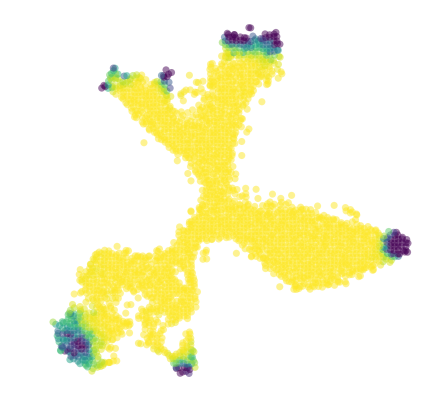

In [779]:
diffused_n = vlm.diffused - np.percentile(vlm.diffused, 3)
diffused_n /= np.percentile(diffused_n, 97)
diffused_n = np.clip(diffused_n, 0, 1)

plt.figure(None,(7,7))
vcy.scatter_viz(vlm.embedding[ixs, 0], vlm.embedding[ixs, 1],
                c=diffused_n, alpha=0.5, s=50, lw=0.,
                edgecolor="", cmap="viridis_r", rasterized=True)
plt.axis("off")
plt.savefig("../figures/endpoint_distr_.pdf")

In [780]:
vlm.prepare_markov(sigma_D=diag_step_dist, sigma_W=diag_step_dist/2., direction='backwards', cells_ixs=ixs)
vlm.run_markov(starting_p=np.ones(len(ixs)), n_steps=2500)

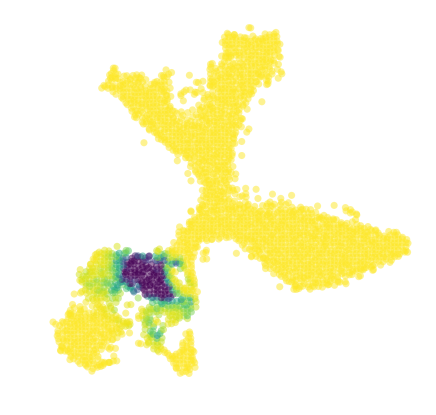

In [781]:
diffused_n = vlm.diffused - np.percentile(vlm.diffused, 3)
diffused_n /= np.percentile(diffused_n, 97)
diffused_n = np.clip(diffused_n, 0, 1)

plt.figure(None,(7,7))
vcy.scatter_viz(vlm.embedding[ixs, 0], vlm.embedding[ixs, 1],
                c=diffused_n, alpha=0.5, s=50, lw=0.,
                edgecolor="", cmap="viridis_r", rasterized=True)
plt.axis("off")
plt.savefig("../figures/startpoint_distr_.pdf")

# try to use pandas profiling

In [ ]:
 # 先要生成dataframe格式的文件才能作为输入

import pandas_profiling
# data是需要生成报告的数据，DataFrame类型
pandas_profiling.ProfileReport(vlm)
pfr = pandas_profiling.ProfileReport(vlm)
pfr.to_file('report.html')